## Schedulers

### In training deep networks, it is helpful to reduce the learning rate as the number of training epochs increases.

<img src="https://miro.medium.com/max/334/1*iYWyu8hemMyaBlK6V-2vqg.png"/>

The above figure depicts that a high learning rate will lead to random to and fro moment of the vector around local minima while a slow learning rate results in getting stuck into false minima. Thus, knowing when to decay the learning rate can be hard to find out.

In [1]:
import warnings;warnings.filterwarnings('ignore')
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
model = nn.Linear(2,2)

Normally,
- Unlike optimizers, lr is updated after few epochs instead of each iteration

## StepLR

In [4]:
gamma = 0.5
step_size = 5
epochs = 20
lr = 1e-1

In [5]:
optimizer = optim.Adam(model.parameters(),lr=lr)

In [6]:
optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[-0.6057,  0.2098],
           [ 0.0487,  0.6376]], requires_grad=True), Parameter containing:
   tensor([-0.0901, -0.3237], requires_grad=True)],
  'lr': 0.1,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False}]

    function(epoch):

        if epoch%step_size == 0:
            lr = lr*gamma
        return lr

In [7]:
scheduler = optim.lr_scheduler.StepLR(optimizer,step_size=step_size,gamma=gamma)

Assumption:

- randomly i choose some number 10, iterations for each epoch

In [8]:
iterations = 10

In [9]:
lrs = []
itrs = []
step=0
for epoch in range(epochs):
    for index in range(iterations):
        pass
#         optimizer.zero_grad()
#         preds = model(inp[index])
#         loss = loss_function(preds,y)
#         loss.backward()
#         optimzer.step()
        
        step+=1
    lrs.append(optimizer.param_groups[0]['lr'])
    itrs.append(epoch+1)
        
    scheduler.step()

In [10]:
len(lrs),len(itrs)

(20, 20)

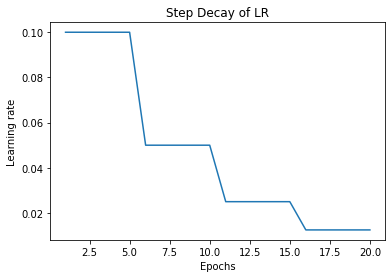

In [11]:
plt.plot(itrs,lrs)
plt.xlabel("Epochs")
plt.ylabel("Learning rate")
plt.title("Step Decay of LR")
plt.show()

## MultiStepLR:

In [12]:
gamma = 0.5
step_size = 2
epochs = 20
lr = 1e-1

In [13]:
optimizer = optim.Adam(model.parameters(),lr=lr)

In [14]:
optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[-0.6057,  0.2098],
           [ 0.0487,  0.6376]], requires_grad=True), Parameter containing:
   tensor([-0.0901, -0.3237], requires_grad=True)],
  'lr': 0.1,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False}]

    function(epoch):
    
        '''
        milestones - list of epoch index
        counter = Counter(milestones) # dict[key = epoch index, value = count of epoch index in milestones]
        '''
            
        lr = lr * gamma**counter[epoch]
        return lr

Note:

- Literal meaning is, customizable step size

In [15]:
scheduler = optim.lr_scheduler.MultiStepLR(optimizer,milestones=[2,4,7,15,19],gamma=gamma)

In [16]:
iterations = 10

In [17]:
lrs = []
itrs = []
step=0
for epoch in range(epochs):
    for index in range(iterations):
#         optimizer.zero_grad()
#         preds = model(inp[index])
#         loss = loss_function(preds,y)
#         loss.backward()
#         optimzer.step()
        
        step+=1
    lrs.append(optimizer.param_groups[0]['lr'])
    itrs.append(epoch+1)
        
    scheduler.step()

In [18]:
len(lrs),len(itrs)

(20, 20)

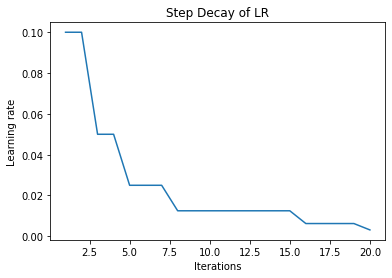

In [19]:
plt.plot(itrs,lrs)
plt.xlabel("Iterations")
plt.ylabel("Learning rate")
plt.title("Step Decay of LR")
plt.show()

## LambdaLR

<mark>Same StepLR can be achieved by LambdaLR</mark>
- pass learning rate updater as lambda function

In [20]:
import math

In [21]:
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate

In [22]:
drop = 0.5
epochs_drop = 2
lr = 1e-1
epochs = 20

    function(epoch):
    
        return base_lr * lambda_fn(epoch)

In [23]:
step_decay = lambda epoch: math.pow(drop,math.floor((1+epoch)/epochs_drop))

In [24]:
optimizer = optim.Adam(model.parameters(),lr=lr)

In [25]:
optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[-0.6057,  0.2098],
           [ 0.0487,  0.6376]], requires_grad=True), Parameter containing:
   tensor([-0.0901, -0.3237], requires_grad=True)],
  'lr': 0.1,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False}]

In [26]:
scheduler = optim.lr_scheduler.LambdaLR(optimizer,lr_lambda=step_decay)

In [27]:
iterations = 10

lrs = []
itrs = []
step=0
for epoch in range(epochs):
    for index in range(iterations):
#         optimizer.zero_grad()
#         preds = model(inp[index])
#         loss = loss_function(preds,y)
#         loss.backward()
#         optimzer.step()
        
        step+=1
    lrs.append(optimizer.param_groups[0]['lr'])
    itrs.append(epoch+1)
        
    scheduler.step()

In [28]:
len(lrs),len(itrs)

(20, 20)

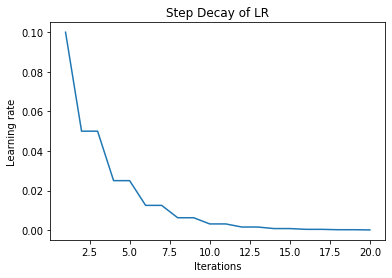

In [29]:
plt.plot(itrs,lrs)
plt.xlabel("Iterations")
plt.ylabel("Learning rate")
plt.title("Step of LR")
plt.show()

## ExponentialLR

In [30]:
gamma = 0.5
step_size = 2
epochs = 20
lr = 1e-1

In [31]:
optimizer = optim.Adam(model.parameters(),lr=lr)

In [32]:
optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[-0.6057,  0.2098],
           [ 0.0487,  0.6376]], requires_grad=True), Parameter containing:
   tensor([-0.0901, -0.3237], requires_grad=True)],
  'lr': 0.1,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False}]

    function(epoch):
        
        lr = lr*gamma

In [33]:
scheduler = optim.lr_scheduler.ExponentialLR(optimizer,gamma=gamma)

In [34]:
iterations = 10

In [35]:
lrs = []
itrs = []
step=0
for epoch in range(epochs):
    for index in range(iterations):
#         optimizer.zero_grad()
#         preds = model(inp[index])
#         loss = loss_function(preds,y)
#         loss.backward()
#         optimzer.step()
        
        step+=1
        
    lrs.append(optimizer.param_groups[0]['lr'])
    itrs.append(epoch+1)
        
    scheduler.step()

In [36]:
len(lrs),len(itrs)

(20, 20)

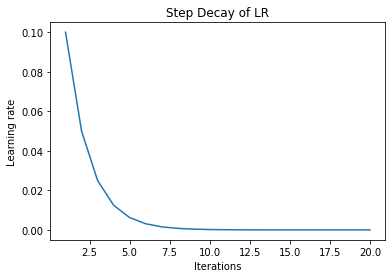

In [37]:
plt.plot(itrs,lrs)
plt.xlabel("Iterations")
plt.ylabel("Learning rate")
plt.title("Exponential of LR")
plt.show()

## Cyclical Learning rate for training Neural networks

- Instead of monotonically decreasing the learning rate, this method lets the learning rate cyclically vary between reasonable boundary values.

***An intuitive understanding of why CLR methods work comes from considering the loss function topology***

- difficulty in the minimizing loss arises from <mark>saddle points</mark> rather than poor local minima
- saddle points have small gradients that slow the learning process
- Hence, increasing the learning rate allows more rapid travesal of saddle point plateaus

**Terminologies:**

- max_iterations = total number of iterations in training loop. It can be calculated by multiplying total number of epochs and number of iterations per epoch.
- stepsize = number of iterations to reach boundary value (pytorch has stepsize down and stepsize down)
- base_lr = minimum learning rate
- max_lr = maximum learning rate (learning rate varies between these 2 boundaries for each cycle)

    function(step):
    
        cycle = 1 + step/(2*stepsize)
        x = abs(step/stepsize - (2*cycle) + 1)
        lr = base_lr + (max_lr - base_lr)*max(0,(1-x))

**Policies:**
<img src="https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-25-at-8.44.49-PM.png"/>


In [38]:
lr=1e-3

In [39]:
optimizer = optim.Adam(model.parameters(),lr=lr)

In [40]:
optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[-0.6057,  0.2098],
           [ 0.0487,  0.6376]], requires_grad=True), Parameter containing:
   tensor([-0.0901, -0.3237], requires_grad=True)],
  'lr': 0.001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False}]

In [41]:
scheduler = optim.lr_scheduler.CyclicLR(optimizer,
                                        base_lr=1e-3,
                                        max_lr=0.006,
                                        step_size_up=10,
                                        step_size_down=90,
                                        cycle_momentum=False)

In [42]:
iterations = 10

In [43]:
lrs = []
itrs = []
step=0
epochs=10
for epoch in range(epochs):
    for index in range(iterations):
#         optimizer.zero_grad()
#         preds = model(inp[index])
#         loss = loss_function(preds,y)
#         loss.backward()
#         optimzer.step()
        scheduler.step()
        
        step+=1
        lrs.append(optimizer.param_groups[0]['lr'])
        itrs.append(step)
        
    

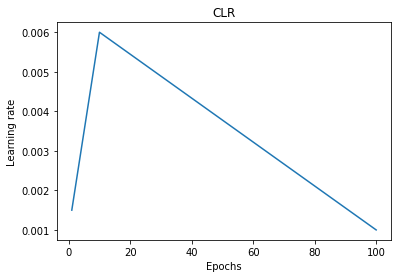

In [44]:
plt.plot(itrs,lrs)
plt.xlabel("Epochs")
plt.ylabel("Learning rate")
plt.title("CLR")
plt.show()